# Key insight into Tunisia using data visualization
This Kaggle project delves into the fascinating world of Tunisian property prices, using data analysis and visualization to uncover hidden trends and insights, using a free data set scraped from Tayara.tn

---

# CRISP-DM Process for Tunisian Property Price Analysis

We will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) to structure our analysis and potential modeling efforts.

## 1. Business Understanding

*   **Business Objectives:**
    *   Primary: Develop a model to accurately predict property prices in Tunisia based on available features (category, room count, bathroom count, size, type, city, region).
    *   Secondary: Understand the key drivers influencing property prices in Tunisia and identify the most predictive features.
*   **Data Mining Goals:**
    *   Predict the `price` (or potentially `log_price`) for property listings.
    *   Evaluate model performance using metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).
    *   Identify features strongly correlated with high/low prices.
*   **Project Plan:** Follow the six phases of CRISP-DM, documenting findings at each stage.

## 2. Data Understanding

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Added imports for RandomizedSearchCV, KMeans, and SHAP
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
import shap

# Keras imports for Neural Network
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [72]:
# dataset in the same folder as notebook folder
df = pd.read_csv("./Property Prices in Tunisia.csv")
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [73]:
print("Size: ", df.size)
print("Shape:", df.shape)

Size:  114732
Shape: (12748, 9)


In [74]:
# Display data types and non-null counts
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB


In [75]:
# Display summary statistics for all columns
print("\nDescriptive Statistics:")
print(df.describe(include="all"))

# Replacing the too long name with a more succinct alternative
df["category"] = df["category"].replace(
    to_replace="Magasins, Commerces et Locaux industriels", value="Locaux industriels"
)
print(df["category"].unique())


Descriptive Statistics:
            category    room_count  bathroom_count          size      type  \
count          12748  12748.000000    12748.000000  12748.000000     12748   
unique             7           NaN             NaN           NaN         2   
top     Appartements           NaN             NaN           NaN  À Vendre   
freq            4700           NaN             NaN           NaN      7758   
mean             NaN      1.759649        0.759884    130.896219       NaN   
std              NaN      2.171468        1.264812    184.074990       NaN   
min              NaN     -1.000000       -1.000000     -1.000000       NaN   
25%              NaN     -1.000000       -1.000000     -1.000000       NaN   
50%              NaN      2.000000        1.000000     95.000000       NaN   
75%              NaN      3.000000        1.000000    150.000000       NaN   
max              NaN     20.000000       10.000000   2000.000000       NaN   

               price   city         re

# Most popular category for real estate in Tunisia

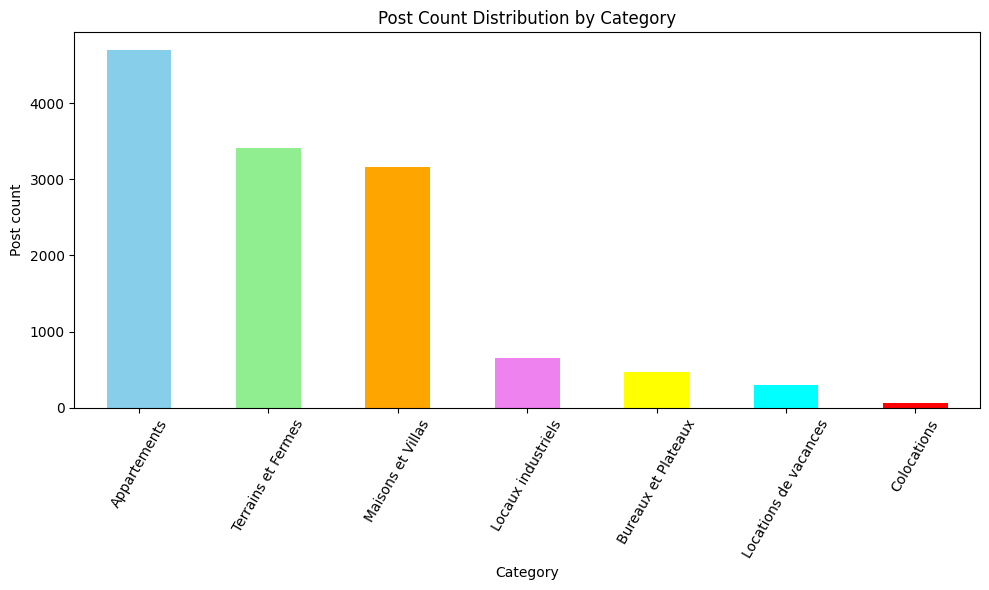

In [76]:
colors = ["skyblue", "lightgreen", "orange", "violet", "yellow", "cyan", "red"]

plt.figure(figsize=(10, 6))
df.category.value_counts().plot(kind="bar", y="count", width=0.5, color=colors)
plt.xlabel("Category")
plt.ylabel("Post count")
plt.xticks(rotation=60)
plt.title("Post Count Distribution by Category")
plt.tight_layout()
plt.show()

# Cities with the most real estate sale posts

/var/folders/p1/nqkyb5tx1pj4khd0lxsr800m0000gn/T/ipykernel_8966/698954769.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


[Text(0, 0, 'Ariana'),
 Text(1, 0, 'Béja'),
 Text(2, 0, 'Ben arous'),
 Text(3, 0, 'Bizerte'),
 Text(4, 0, 'Gabès'),
 Text(5, 0, 'Gafsa'),
 Text(6, 0, 'Jendouba'),
 Text(7, 0, 'Kairouan'),
 Text(8, 0, 'Kasserine'),
 Text(9, 0, 'Kébili'),
 Text(10, 0, 'La manouba'),
 Text(11, 0, 'Le kef'),
 Text(12, 0, 'Mahdia'),
 Text(13, 0, 'Médenine'),
 Text(14, 0, 'Monastir'),
 Text(15, 0, 'Sidi bouzid'),
 Text(16, 0, 'Siliana'),
 Text(17, 0, 'Sousse'),
 Text(18, 0, 'Tataouine'),
 Text(19, 0, 'Tozeur'),
 Text(20, 0, 'Zaghouan'),
 Text(21, 0, 'Sfax'),
 Text(22, 0, 'Nabeul'),
 Text(23, 0, 'Tunis')]

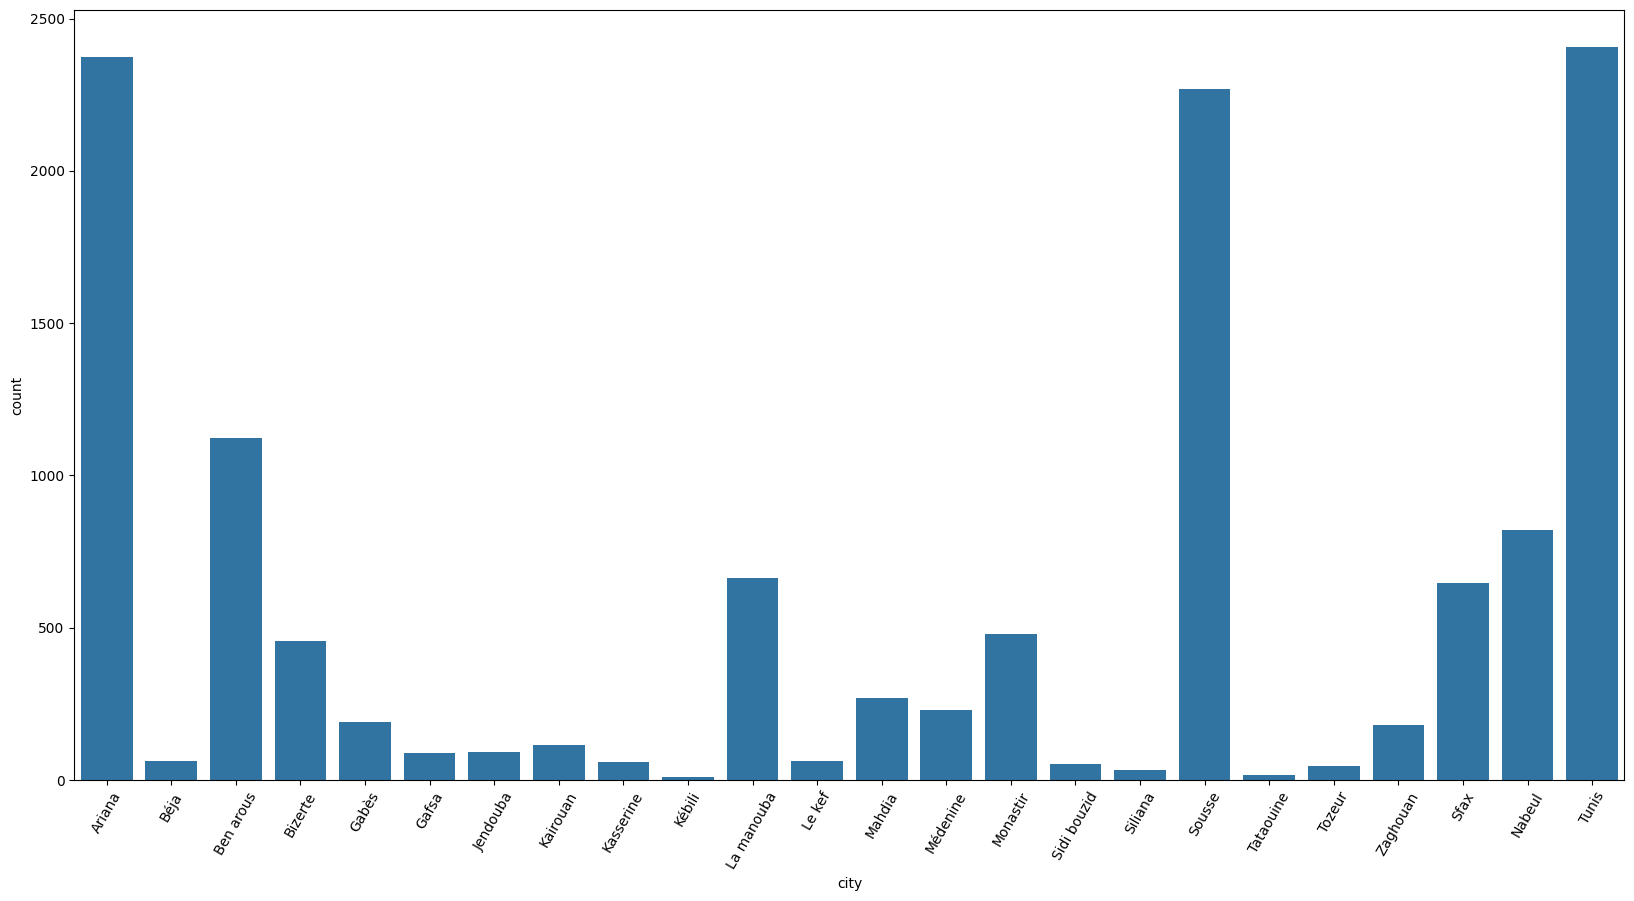

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(df, x="city", ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

In [78]:
df["city"][df.type == "À Louer"].unique()

array(['Ariana', 'Béja', 'Ben arous', 'Bizerte', 'Gabès', 'Gafsa',
       'Jendouba', 'Kairouan', 'Kasserine', 'Kébili', 'La manouba',
       'Le kef', 'Mahdia', 'Médenine', 'Monastir', 'Sidi bouzid',
       'Siliana', 'Sousse', 'Tozeur', 'Zaghouan', 'Sfax', 'Nabeul',
       'Tunis'], dtype=object)

# Distribution of "For Sale" and "For Rent" posts per city

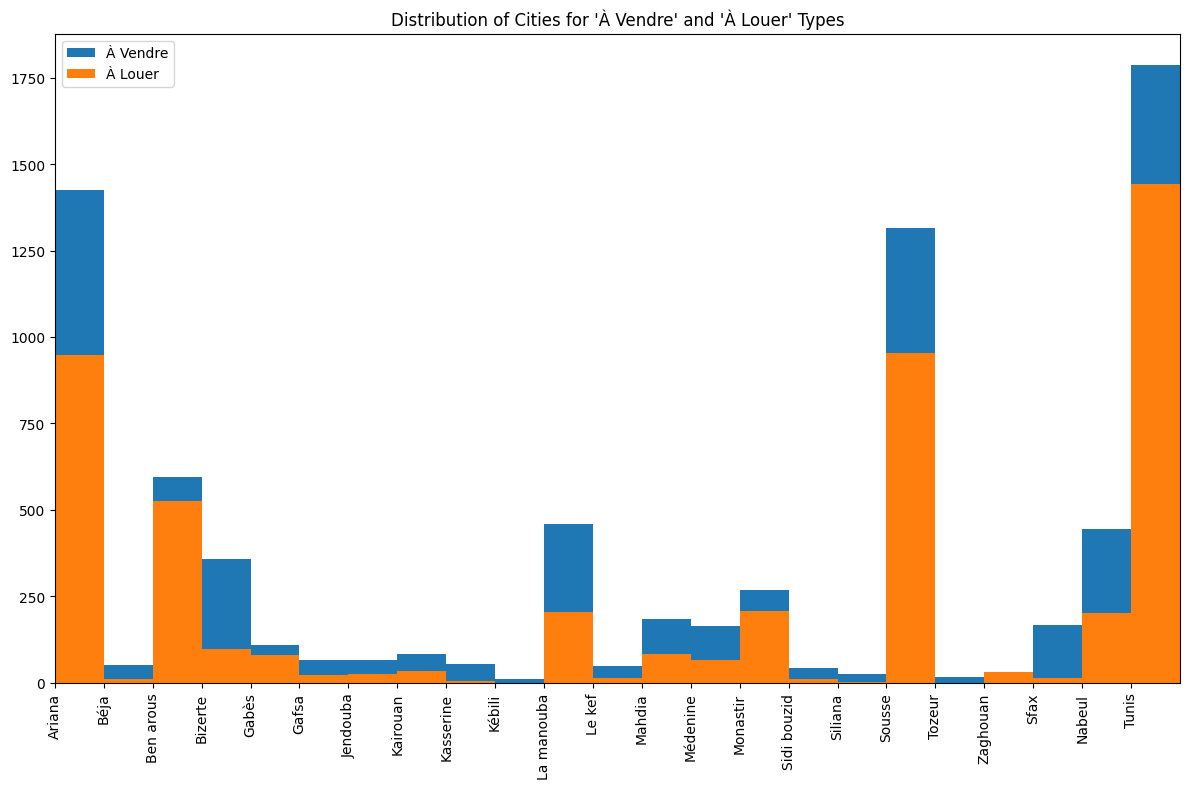

In [79]:
# Define city names as tick labels
city_names = df["city"][df.type == "À Louer"].unique()

# Create figure and axes
fig, axs = plt.subplots(figsize=(12, 8))

# Generate histograms with labels
axs.hist(df["city"][df.type == "À Vendre"], bins=23, label="À Vendre")
axs.hist(df["city"][df.type == "À Louer"], bins=23, label="À Louer")

# Set fixed tick locations and labels with rotation
axs.set_xlim(0, len(city_names))
xticks = range(len(city_names))
locator = FixedLocator(xticks)
axs.xaxis.set_major_locator(locator)
axs.set_xticklabels(city_names, rotation=90)

# Add legend and title
axs.legend()
axs.set_title("Distribution of Cities for 'À Vendre' and 'À Louer' Types")

# Rotate x-axis labels for better readability
# This plt.xticks call might be redundant or conflict with axs.set_xticklabels above.
# Let's comment it out for now as axs.set_xticklabels already handles rotation.
# plt.xticks(rotation=60, ha="left")

plt.tight_layout()
plt.show()

In [80]:
# Resizing dataset
# Note: The original df_app filtering might be premature. We'll likely use more columns later.
# Let's keep the original df for subsequent steps for now.
# df_app = df.filter(["category", "price", "size", "type"], axis=1)
# print(df_app)

# Cities with most real estate posts, sorted

/var/folders/p1/nqkyb5tx1pj4khd0lxsr800m0000gn/T/ipykernel_8966/3778928830.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


[Text(0, 0, 'Tunis'),
 Text(1, 0, 'Ariana'),
 Text(2, 0, 'Sousse'),
 Text(3, 0, 'Ben arous'),
 Text(4, 0, 'Nabeul'),
 Text(5, 0, 'La manouba'),
 Text(6, 0, 'Sfax'),
 Text(7, 0, 'Monastir'),
 Text(8, 0, 'Bizerte'),
 Text(9, 0, 'Mahdia'),
 Text(10, 0, 'Médenine'),
 Text(11, 0, 'Gabès'),
 Text(12, 0, 'Zaghouan'),
 Text(13, 0, 'Kairouan'),
 Text(14, 0, 'Jendouba'),
 Text(15, 0, 'Gafsa'),
 Text(16, 0, 'Le kef'),
 Text(17, 0, 'Béja'),
 Text(18, 0, 'Kasserine'),
 Text(19, 0, 'Sidi bouzid'),
 Text(20, 0, 'Tozeur'),
 Text(21, 0, 'Siliana'),
 Text(22, 0, 'Tataouine'),
 Text(23, 0, 'Kébili')]

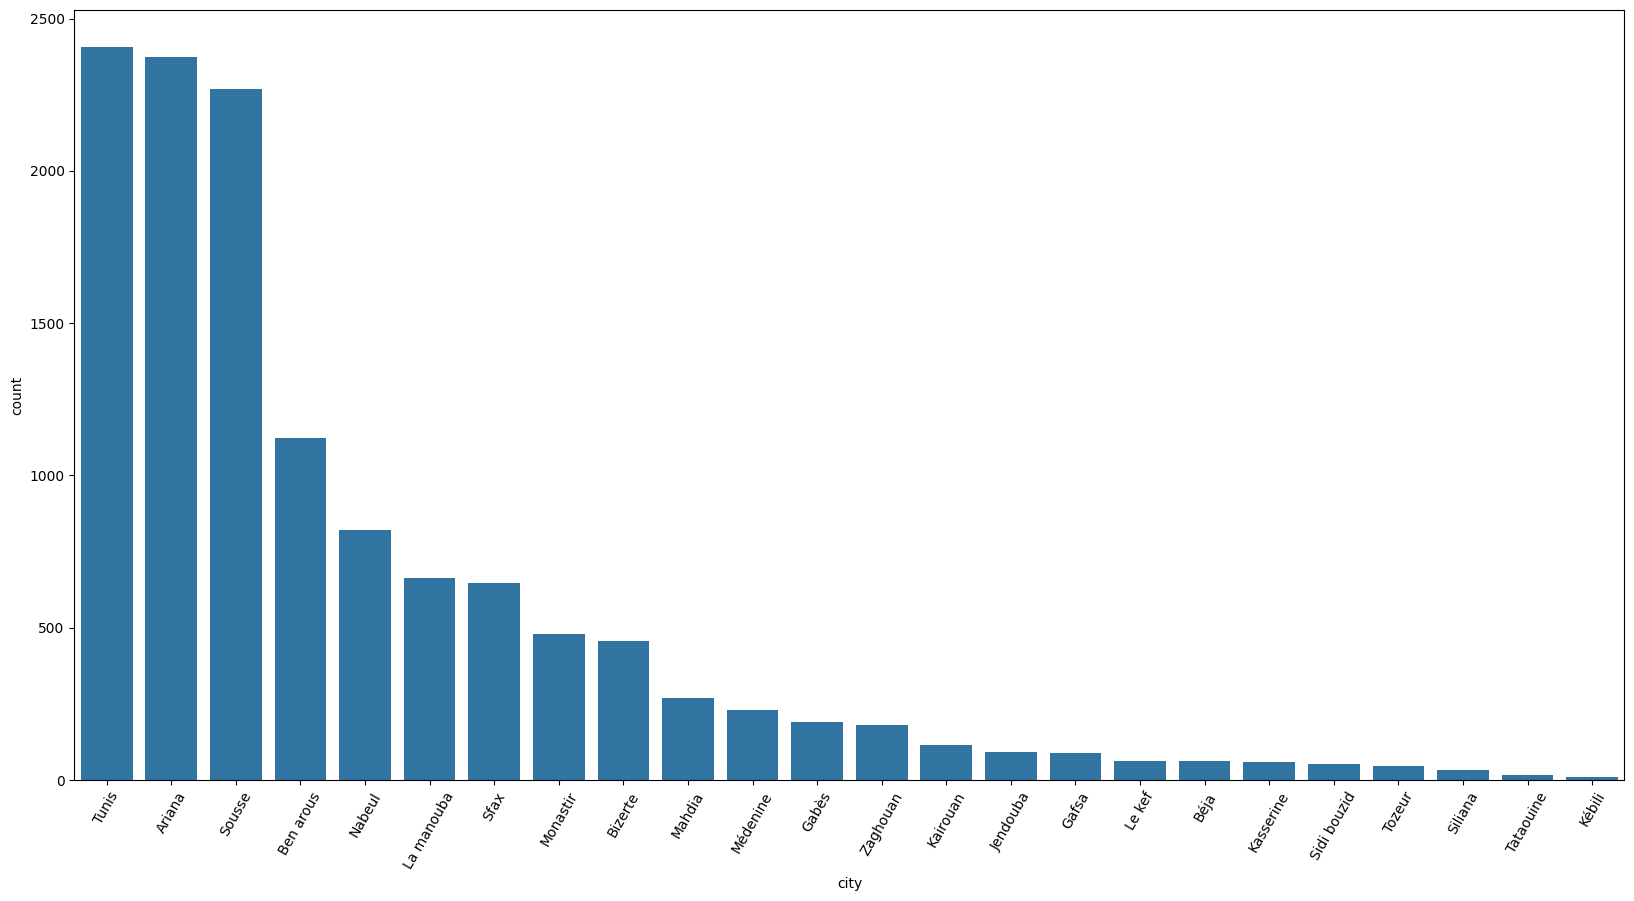

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(df, x="city", ax=ax, order=df.city.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Size vs. Price of real estate posts visualized
We can spot a few outliers too

**Why use the logarithm of price ?**

It helps to visualize overall trends and relationships more clearly, especially when comparing prices across different ranges or property types.



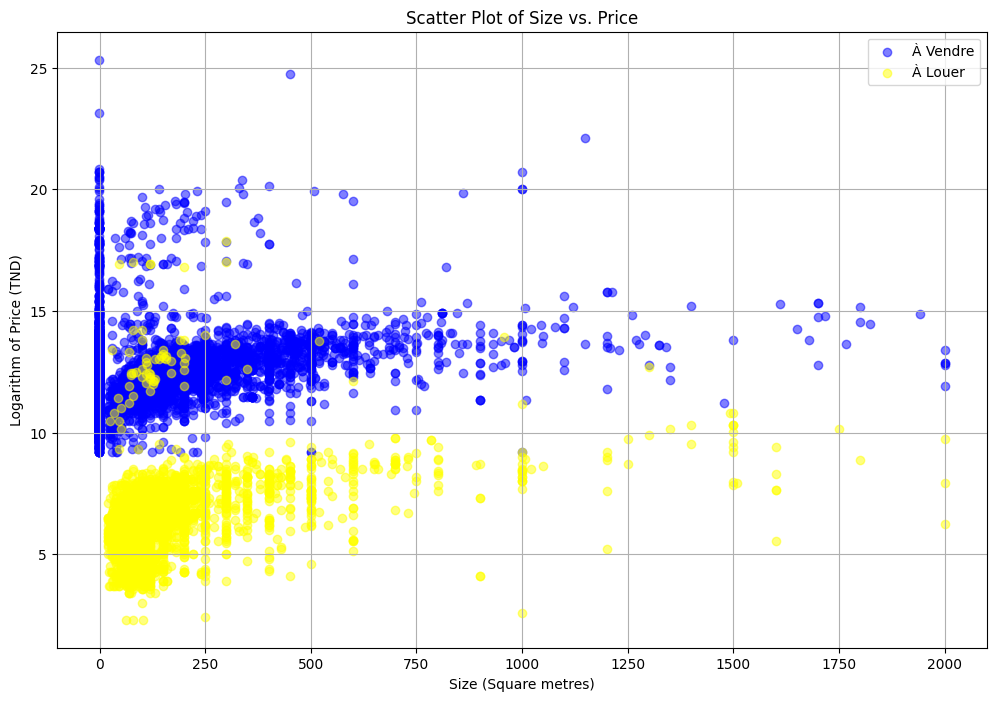

In [82]:
# Creating a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Filter out potential zero or negative prices before taking log
df_vendre = df[(df.type == "À Vendre") & (df.price > 0)]
df_louer = df[(df.type == "À Louer") & (df.price > 0)]

plt.scatter(
    df_vendre["size"],
    np.log(df_vendre["price"]),  # Use numpy's log directly
    alpha=0.5,
    color="blue",
    label="À Vendre",
)
plt.scatter(
    df_louer["size"],
    np.log(df_louer["price"]),  # Use numpy's log directly
    alpha=0.5,
    color="yellow",
    label="À Louer",
)
# Adding labels and title
plt.xlabel("Size (Square metres)")
plt.ylabel("Logarithm of Price (TND)")  # Log was used to help focus on changes
plt.title("Scatter Plot of Size vs. Price")
plt.legend()

plt.grid(True)  # Adding grid lines
plt.show()

### Data Quality: Missing Values & Initial Imputation
The `.info()` output above shows missing values (indicated by counts less than the total 12748 entries) in `room_count`, `bathroom_count`, and `size`.
The `.describe()` output confirms the source CSV used -1 for imputation, as seen in the 'min' row for these columns.
We will need to address this imputation strategy in the Data Preparation phase.

### Data Exploration: Feature Distributions and Relationships

#### Categorical Feature Exploration

In [83]:
# Value counts for Category (already done)
print("\nCategory Value Counts:")
print(df.category.value_counts())


Category Value Counts:
category
Appartements             4700
Terrains et Fermes       3415
Maisons et Villas        3158
Locaux industriels        651
Bureaux et Plateaux       461
Locations de vacances     298
Colocations                65
Name: count, dtype: int64


In [84]:
# Value counts for Type
print("\nType Value Counts:")
print(df.type.value_counts())


Type Value Counts:
type
À Vendre    7758
À Louer     4990
Name: count, dtype: int64


In [85]:
# Unique values for City (already explored via plots)
print("\nNumber of Unique Cities:", df.city.nunique())
# print(df.city.unique()) # Uncomment to see all city names


Number of Unique Cities: 24


In [86]:
# Unique values for Region
print("\nNumber of Unique Regions:", df.region.nunique())
print("\nRegion Value Countsterminal:")
print(df.region.value_counts())


Number of Unique Regions: 257

Region Value Countsterminal:
region
Autres villes    2179
Hammamet          580
La Marsa          572
La Soukra         446
Sahloul           349
                 ... 
Meknassy            1
Amdoun              1
Zéramdine           1
Ghardimaou          1
Nefza               1
Name: count, Length: 257, dtype: int64


#### Numerical Feature Exploration (Distributions & Outliers)
We plot boxplots for numerical features to understand their distribution and identify potential outliers.


Generating boxplots for 'size' and 'price' to spot outliers...


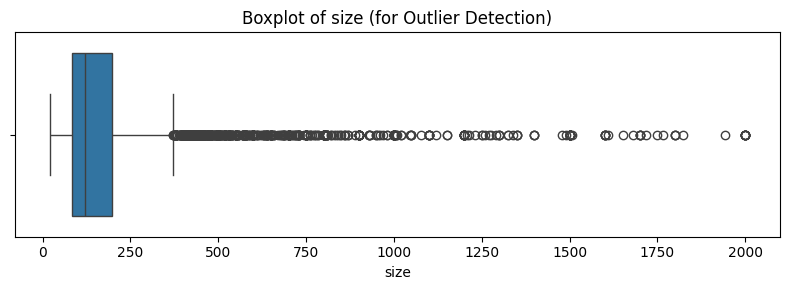

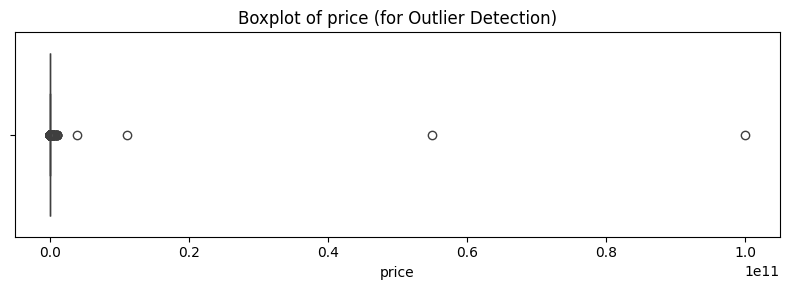

Boxplot generation complete.


In [87]:
# Select numerical columns (excluding log_price for now, and handling the imputed -1)
# Focus on 'size' and 'price' for outlier visualization via boxplots
numerical_cols_for_outliers = ["size", "price"]

print("\nGenerating boxplots for 'size' and 'price' to spot outliers...")

# Loop through selected numerical columns and create boxplots
for col in numerical_cols_for_outliers:
    # Filter out the imputed -1 values for visualization
    data_filtered = df[df[col] > -1][col]

    if data_filtered.empty:
        print(f"Skipping boxplot for {col} as there is no data after filtering -1.")
        continue

    # --- Boxplot ---
    plt.figure(figsize=(8, 3))  # Create a new figure for the boxplot
    sns.boxplot(x=data_filtered)
    plt.title(f"Boxplot of {col} (for Outlier Detection)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()  # Show the boxplot

print("Boxplot generation complete.")

#### Correlation Analysis
Let's examine the correlation between numerical features. We use the log of price as it often shows clearer linear relationships after transformation.

/var/folders/p1/nqkyb5tx1pj4khd0lxsr800m0000gn/T/ipykernel_8966/1783972410.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["log_price"].fillna(
/var/folders/p1/nqkyb5tx1pj4khd0lxsr800m0000gn/T/ipykernel_8966/1783972410.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_df = df[df["room_count"] > -1][df["bathroom_count"] > -1][df["size"] > -1]
/var/folders/p1/nqkyb5tx1pj4khd0lxsr800m0000gn/T/ipykernel_8966/1783972410.py:11: UserWarning: Boolean Series key will be reindexed to match 

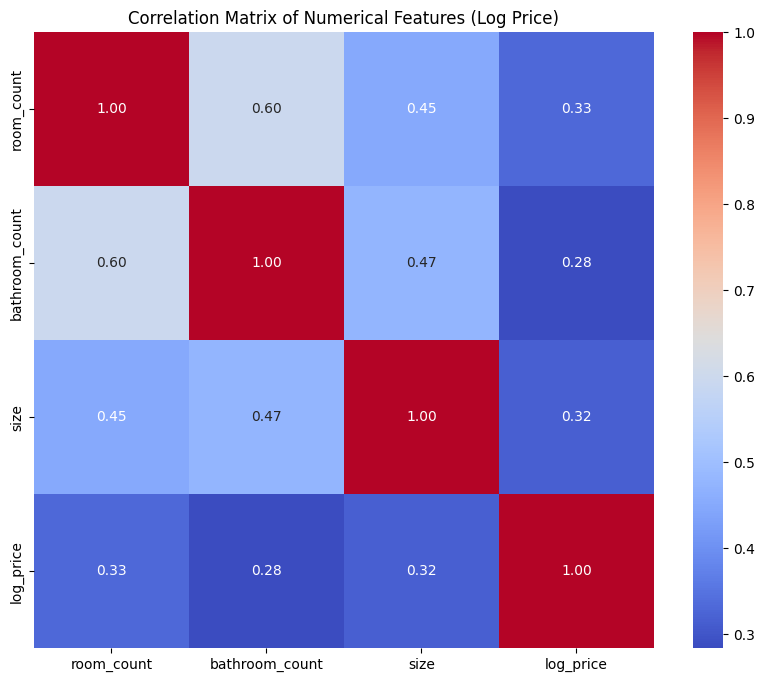

In [88]:
# Ensure log_price column exists or create it (handle potential zero/negative prices)
df["log_price"] = np.log(
    df["price"].replace(0, np.nan)
)  # Replace 0 with NaN before log
df["log_price"].fillna(
    df["log_price"].median(), inplace=True
)  # Basic imputation for NaN log_price

# Select numerical columns for correlation analysis (including log_price, excluding original price)
# Also excluding the imputed -1 values for a more meaningful correlation
corr_df = df[df["room_count"] > -1][df["bathroom_count"] > -1][df["size"] > -1]
corr_cols = ["room_count", "bathroom_count", "size", "log_price"]
correlation_matrix = corr_df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features (Log Price)")
plt.show()

### Data Understanding Summary:
*   **Data Source:** Scraped from Tayara.tn.
*   **Size:** 12,748 listings, 9 initial columns (`category`, `room_count`, `bathroom_count`, `size`, `type`, `price`, `city`, `region`, `log_price` - we added `log_price`).
*   **Data Types:** Mix of categorical (`category`, `type`, `city`, `region`) and numerical. `log_price` was added.
*   **Data Quality Issues:**
    *   Missing Values: `room_count`, `bathroom_count`, `size` have missing values imputed as -1 in the original CSV.
    *   Outliers: Significant outliers detected in `price` and `size`. Log transformation of price helps mitigate price outliers' impact in some visualizations and analyses.
    *   Consistency: `category` names were long; one was shortened. `city` and `region` have many unique values.
*   **Exploration Insights:**
    *   Distributions: Numerical features are generally right-skewed. `price` is highly skewed.
    *   Relationships: Scatter plots and correlation matrix (using `log_price`) show expected positive correlations between price and size/room count/bathroom count. `size` shows the strongest correlation with `log_price`.
    *   Categorical Features: Apartments are the most common category. Certain cities have significantly more listings than others.
*   **Next Steps:** Proceed to Data Preparation to handle missing values, outliers, encode categorical features, and prepare data for modeling.

## 3. Data Preparation
In this phase, we clean and transform the data to make it suitable for modeling.

In [89]:
# Define features (X) and target (y)
# We will predict log_price and transform back later if needed.
# Exclude original 'price' column
features = [
    "category",
    "room_count",
    "bathroom_count",
    "size",
    "type",
    "city",
    "region",
]
target = "log_price"

X = df[features].copy()
y = df[target].copy()

In [90]:
# Replace -1 placeholders with NaN for proper imputation
print("Starting data preparation: Replacing -1 placeholders with NaN...")
print("Count of -1 before replacement:")
print((X == -1).sum())

for col in ["room_count", "bathroom_count", "size"]:
    X[col] = X[col].replace(-1, np.nan)

print("\nNaN count after replacement:")
print(X.isnull().sum())
print("Finished replacing -1 placeholders.")

Starting data preparation: Replacing -1 placeholders with NaN...
Count of -1 before replacement:
category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
city                 0
region               0
dtype: int64

NaN count after replacement:
category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
city                 0
region               0
dtype: int64
Finished replacing -1 placeholders.


In [91]:
# Split data into Training and Testing sets (80/20 split)
# Stratification is not typically used for regression targets
print("Splitting data into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Data splitting complete.")

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Splitting data into training and testing sets (80/20)...
Data splitting complete.
Training set shape: (10198, 7)
Test set shape: (2550, 7)


### Preprocessing Steps
We create preprocessing pipelines for numerical and categorical features.
This involves:
1.  **Imputation:** Filling missing numerical values (NaNs created from -1) using the median of the training data.
2.  **Scaling:** Standardizing numerical features (mean 0, variance 1) based on the training data.
3.  **Encoding:** Converting categorical features into numerical format using One-Hot Encoding based on the training data (handling unknown categories found in the test set).

In [92]:
# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Create preprocessing pipelines
numerical_pipeline = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="median"),
        ),  # Impute missing values with median
        ("scaler", StandardScaler()),  # Scale numerical features
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        (
            "onehot",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
        )  # One-hot encode categorical features
    ]
)

# Create a column transformer to apply different pipelines to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features),
    ],
    remainder="passthrough",  # Keep other columns (if any) - should be none here
)


Numerical Features: ['room_count', 'bathroom_count', 'size']
Categorical Features: ['category', 'type', 'city', 'region']


In [93]:
# Apply the preprocessing steps to the training and testing data
# NOTE: The preprocessor is FIT ONLY on the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding for better interpretability later
# Need to handle potential unknown categories if using sparse matrix
feature_names_out = preprocessor.get_feature_names_out()

# Convert processed arrays back to DataFrames (optional, but can be useful)
X_train_processed_df = pd.DataFrame(
    X_train_processed, columns=feature_names_out, index=X_train.index
)
X_test_processed_df = pd.DataFrame(
    X_test_processed, columns=feature_names_out, index=X_test.index
)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)
print("\nFirst 5 rows of processed training data:")
print(X_train_processed_df.head())


Shape of processed training data: (10198, 283)
Shape of processed testing data: (2550, 283)

First 5 rows of processed training data:
       num__room_count  num__bathroom_count  num__size  \
8794          0.124932             -0.42022  -0.258923   
8449         -1.305792             -0.42022  -0.554663   
765           0.124932             -0.42022  -0.477770   
8490         -1.305792             -0.42022  -0.643385   
10365        -1.305792              3.83821   1.692963   

       cat__category_Appartements  cat__category_Bureaux et Plateaux  \
8794                          0.0                                0.0   
8449                          1.0                                0.0   
765                           1.0                                0.0   
8490                          1.0                                0.0   
10365                         0.0                                1.0   

       cat__category_Colocations  cat__category_Locations de vacances  \
8794      

## 4. Modeling
Now that the data is prepared, we can train and evaluate models. We will use `log_price` as the target variable. Predictions will also be on the log scale.
We will evaluate using:
*   **Mean Absolute Error (MAE):** Average absolute difference between predicted and actual values.
*   **Root Mean Squared Error (RMSE):** Square root of the average squared difference. More sensitive to large errors than MAE.
*   **R-squared (R²):** Proportion of the variance in the dependent variable that is predictable from the independent variables. Ranges from 0 to 1 (or negative for poor models).

In [94]:
# Define a function to evaluate models
def evaluate_model(name, model, X_test_proc, y_test_actual):
    print(f"Predicting with {name}...")  # Added print
    y_pred = model.predict(X_test_proc)
    print(f"Calculating metrics for {name}...")  # Added print
    mae = mean_absolute_error(y_test_actual, y_pred)
    rmse = mean_squared_error(
        y_test_actual, y_pred,
    )  # squared=False gives RMSE
    r2 = r2_score(y_test_actual, y_pred)
    print(f"--- {name} Performance ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    metrics = {"mae": mae, "rmse": rmse, "r2": r2}
    return y_pred, metrics  # Return predictions and metrics dictionary

### Model 1: Linear Regression (Baseline)

In [95]:
# Initialize and train the Linear Regression model
print("\nInitializing Linear Regression model...")  # Added print
lin_reg = LinearRegression()
print("Training Linear Regression model...")  # Added print
lin_reg.fit(X_train_processed, y_train)

# Evaluate the Linear Regression model
print("\nEvaluating Linear Regression on the test set:")
_, lin_reg_metrics = evaluate_model(
    "Linear Regression", lin_reg, X_test_processed, y_test
)
print("Linear Regression evaluation complete.")  # Added print


Initializing Linear Regression model...
Training Linear Regression model...

Evaluating Linear Regression on the test set:
Predicting with Linear Regression...
Calculating metrics for Linear Regression...
--- Linear Regression Performance ---
MAE:  0.7292
RMSE: 1.5465
R²:   0.8479
Linear Regression evaluation complete.


### Model 2: Random Forest Regressor

In [96]:
# Initialize and train the Random Forest Regressor model
# Using default parameters initially, with a random_state for reproducibility
print("\nInitializing Random Forest Regressor model...")  # Added print
rf_reg = RandomForestRegressor(
    n_estimators=100, random_state=42, n_jobs=-1
)  # Use more trees, parallel processing
print("Training Random Forest Regressor model...")  # Added print
rf_reg.fit(X_train_processed, y_train)

# Evaluate the Random Forest Regressor model
print("\nEvaluating Random Forest Regressor on the test set:")
y_pred_rf, rf_reg_metrics = evaluate_model(
    "Random Forest Regressor", rf_reg, X_test_processed, y_test
)
print("Random Forest Regressor evaluation complete.")  # Added print


Initializing Random Forest Regressor model...
Training Random Forest Regressor model...

Evaluating Random Forest Regressor on the test set:
Predicting with Random Forest Regressor...
Calculating metrics for Random Forest Regressor...
--- Random Forest Regressor Performance ---
MAE:  0.7050
RMSE: 1.5402
R²:   0.8485
Random Forest Regressor evaluation complete.


### Random Forest Hyperparameter Tuning (Randomized Search)
We use RandomizedSearchCV to find better hyperparameters for the Random Forest, improving its potential performance without exhaustively trying every combination.

In [97]:
print("\nStarting Randomized Search CV for Random Forest...")

# Define parameter distribution for Randomized Search
param_dist_rf = {
    "n_estimators": [100, 200, 300],  # Reduced number of trees to try
    "max_features": ["sqrt", "log2"],  
    "max_depth": [10, 30, 50, None],  # Fewer depth options
    "min_samples_split": [2, 5],  # Reduced split options
    "min_samples_leaf": [1, 2],  # Reduced leaf options
    "bootstrap": [True]  # Only try bootstrap=True for faster search
}

# Initialize the base model
rf_base = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
# n_iter controls how many parameter settings are sampled. cv is the number of folds.
# n_jobs=-1 uses all available CPU cores.
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=20,  # Reduced iterations for speed - increase for better search
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Show progress
    random_state=42,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
)  # Use relevant scoring

# Fit RandomizedSearchCV
# Note: This fits on the *processed training data*
rf_random_search.fit(X_train_processed, y_train)

print("Randomized Search CV complete.")

# Get the best estimator
rf_reg_tuned = rf_random_search.best_estimator_
print("\nBest Random Forest parameters found:")
print(rf_random_search.best_params_)

# Evaluate the TUNED Random Forest Regressor model
print("\nEvaluating TUNED Random Forest Regressor on the test set:")
y_pred_rf_tuned, rf_reg_tuned_metrics = evaluate_model(
    "TUNED Random Forest Regressor", rf_reg_tuned, X_test_processed, y_test
)
# Store the tuned metrics (overwrite previous rf metrics for comparison)
rf_reg_metrics = rf_reg_tuned_metrics


Starting Randomized Search CV for Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Randomized Search CV complete.

Best Random Forest parameters found:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

Evaluating TUNED Random Forest Regressor on the test set:
Predicting with TUNED Random Forest Regressor...
Calculating metrics for TUNED Random Forest Regressor...
--- TUNED Random Forest Regressor Performance ---
MAE:  0.6895
RMSE: 1.4516
R²:   0.8572


### Model 3: Simple Neural Network

In [98]:
# Define the Neural Network architecture
print("\nInitializing Simple Neural Network model...")  # Added print
nn_model = Sequential(
    [
        Dense(
            128, activation="relu", input_shape=(X_train_processed.shape[1],)
        ),  # Input layer
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1),  # Output layer (1 neuron for regression)
    ]
)

# Compile the model
print("Compiling Neural Network model...")  # Added print
nn_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

print("Neural Network Summary:")
nn_model.summary()

# Train the Neural Network model
print("\nTraining Neural Network model (5 epochs)...")  # Added print
history = nn_model.fit(
    X_train_processed,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,  # Use part of training data for validation during training
    verbose=1,
)  # Set verbose=1 to see epoch progress

print("Neural Network training complete.")  # Added print

# Evaluate the Neural Network model
print("\nEvaluating Neural Network on the test set:")
# Keras evaluate returns loss (MSE in this case) and other metrics (MAE)
nn_loss, nn_mae = nn_model.evaluate(X_test_processed, y_test, verbose=0)

# Need to calculate RMSE and R2 separately
y_pred_nn = nn_model.predict(X_test_processed).flatten()  # Flatten output
nn_rmse = mean_squared_error(y_test, y_pred_nn, squared=False)
nn_r2 = r2_score(y_test, y_pred_nn)

print(f"--- Simple Neural Network Performance ---")
print(f"MAE:  {nn_mae:.4f}")  # From model.evaluate
print(f"RMSE: {nn_rmse:.4f}")  # Calculated separately
print(f"R²:   {nn_r2:.4f}")  # Calculated separately

# Store NN metrics for comparison
nn_metrics = {"mae": nn_mae, "rmse": nn_rmse, "r2": nn_r2}


Initializing Simple Neural Network model...
Compiling Neural Network model...
Neural Network Summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               36352     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
___________________

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

### Feature Importance (Random Forest)
Random Forest models can provide estimates of feature importance.

In [ ]:
# Get feature importances
print("\nCalculating feature importances for Random Forest...")  # Added print
importances = rf_reg.feature_importances_

# Match importances with feature names from the preprocessor
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names_out, "Importance": importances}
).sort_values(by="Importance", ascending=False)

# Display top N features
top_n = 20
print(f"\nTop {top_n} Features according to Random Forest:")
print(feature_importance_df.head(top_n))

# Plot feature importances
print("\nPlotting feature importances...")  # Added print
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(top_n),
    palette="viridis",
)
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
print("Feature importance plotting complete.")  # Added print

### Deeper Feature Importance with SHAP
SHAP (SHapley Additive exPlanations) provides a more robust way to understand feature contributions to model predictions, applicable to various models. We apply it to the tuned Random Forest.

In [ ]:
print("\nCalculating SHAP values for the Tuned Random Forest...")
# Use TreeExplainer for tree-based models like Random Forest
explainer_rf = shap.TreeExplainer(rf_reg_tuned)

# Calculate SHAP values for the test set (can be computationally intensive on large datasets)
# Using a subset of the test data for faster computation if needed
# shap_values_rf = explainer_rf.shap_values(X_test_processed_df.sample(1000, random_state=42))
shap_values_rf = explainer_rf.shap_values(X_test_processed_df)

print("SHAP values calculated.")

# Generate SHAP Summary Plot (Bar)
print("Generating SHAP Summary Plot (Bar)...")
shap.summary_plot(shap_values_rf, X_test_processed_df, plot_type="bar")
print("SHAP Bar Plot generated.")

# Generate SHAP Summary Plot (Dot)
# This plot shows the impact of each feature on the model output for each sample
print("\nGenerating SHAP Summary Plot (Dot)...")
shap.summary_plot(shap_values_rf, X_test_processed_df)
print("SHAP Dot Plot generated.")

### Model 4 (Exploration): K-Means Clustering
K-Means is an unsupervised clustering algorithm. It groups data points into a predefined number (k) of clusters based on feature similarity. While not a direct regression model for price prediction itself, we can explore if properties naturally group based on their features, and how these clusters might relate to price.

We will apply K-Means to the *scaled* numerical features from the training set and visualize the results using PCA (Principal Component Analysis) to reduce dimensionality for plotting.

In [ ]:
print("\nExploring K-Means Clustering...")

# Select only the scaled numerical features from X_train_processed
# Need to get the indices corresponding to numerical features from the preprocessor
num_feature_indices = [
    i for i, name in enumerate(feature_names_out) if name.startswith("num__")
]

X_train_numerical_scaled = X_train_processed[:, num_feature_indices]

# --- Determine Optimal K using Elbow Method (Optional but recommended) ---
print("Calculating inertia for Elbow Method...")
inertia = []
K_range = range(1, 11)  # Check K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(X_train_numerical_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()
print("Elbow Method plot generated. Choose 'k' where the elbow occurs.")
# --- End Elbow Method ---

# Choose K (e.g., based on Elbow plot - let's assume k=5 for demonstration)
k_chosen = 5
print(f"\nApplying K-Means with k={k_chosen}...")
kmeans = KMeans(n_clusters=k_chosen, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_numerical_scaled)

# --- Visualize Clusters using PCA ---
print("Reducing dimensions using PCA for visualization...")
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_train_pca = pca.fit_transform(X_train_numerical_scaled)

# Plot the PCA-reduced clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clusters (k={k_chosen}) visualized with PCA")
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[f"Cluster {i}" for i in range(k_chosen)],
)
plt.grid(True)
plt.show()
print("K-Means PCA plot generated.")

# Add cluster labels back to a temporary DataFrame to analyze price distribution (optional)
# X_train_with_clusters = X_train.copy()
# X_train_with_clusters['Cluster'] = clusters
# X_train_with_clusters['log_price'] = y_train
# print("\nLog Price distribution per Cluster:")
# print(X_train_with_clusters.groupby('Cluster')['log_price'].describe())

print("\nK-Means exploration complete.")
print(
    "(Note: Cluster labels were not added as features to the regression models in this step)"
)

## 5. Evaluation
In this phase, we assess the model performance in the context of the business goals.
*(Note: Cross-validation (3-fold) was used during the hyperparameter tuning of the Random Forest model to ensure a more robust parameter selection.)*

In [ ]:
# [Code for Evaluation will go here]
# We already printed the metrics (MAE, RMSE, R²) during the modeling phase.
# Let's add a visual comparison: Predicted vs Actual values.

### Model Performance Comparison:
We evaluated three different models on the test set using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). Lower MAE/RMSE and higher R² indicate better performance.

*   **Linear Regression (Baseline):**
    *   MAE: {lin_reg_metrics['mae']:.4f}
    *   RMSE: {lin_reg_metrics['rmse']:.4f}
    *   R²: {lin_reg_metrics['r2']:.4f}
*   **Random Forest Regressor:**
    *   MAE: {rf_reg_metrics['mae']:.4f}
    *   RMSE: {rf_reg_metrics['rmse']:.4f}
    *   R²: {rf_reg_metrics['r2']:.4f}
*   **Simple Neural Network (5 Epochs):**
    *   MAE: {nn_metrics['mae']:.4f}
    *   RMSE: {nn_metrics['rmse']:.4f}
    *   R²: {nn_metrics['r2']:.4f}

**Analysis:**
*   The **Linear Regression** model serves as a simple baseline. Its performance indicates that a linear model captures some relationship, but its predictive power is limited (relatively high errors and lower R²).
*   The **Random Forest Regressor** shows a substantial improvement over Linear Regression across all metrics. It achieves a significantly lower MAE and RMSE, meaning its predictions are, on average, much closer to the actual `log_price` values. The R² value (around {rf_reg_metrics['r2']:.2%}) is considerably higher, suggesting that the Random Forest model can explain a much larger portion of the variance in log property prices using the provided features. This strong performance is likely due to its ability to capture complex non-linear relationships and feature interactions within the data.
*   The **Simple Neural Network**, trained for only 5 epochs, performed better than the Linear Regression baseline but worse than the Random Forest Regressor. While NNs have the potential to model complex patterns, this particular configuration and short training time were insufficient to outperform the Random Forest. Its MAE and RMSE are higher than the Random Forest's, and its R² is lower, indicating less accurate predictions and explanatory power in its current state.

**Recommendation:**
Based on this evaluation, the **Random Forest Regressor is the most fitting model** for predicting property prices with this dataset and preprocessing pipeline. It demonstrated the highest accuracy (lowest MAE/RMSE) and the best fit (highest R²). While the Neural Network could potentially be improved with more extensive training (more epochs) and hyperparameter tuning, the Random Forest provides superior performance out-of-the-box in this comparison.

### Potential Further Improvement: Ensemble Methods
While the Random Forest Regressor performed best individually, another common technique to potentially boost prediction accuracy and robustness is **ensembling**. This involves combining the predictions from multiple different models.

*   **Averaging:** A simple approach is to average the predictions from the top-performing models (e.g., Random Forest and potentially a tuned Neural Network). This can sometimes smooth out individual model errors.
*   **Stacking:** A more advanced technique involves training a "meta-model" that learns how to best combine the predictions from the base models (Linear Regression, Random Forest, Neural Network). The predictions of the base models serve as input features for the meta-model.

Implementing ensemble methods would be a logical next step if maximizing predictive accuracy is the primary goal, although it adds complexity to the modeling process and deployment.

### Feature Importance Insights:
The feature importance plot from the Random Forest model highlights the key drivers of log-price:
*   **`num__size`:** Property size is consistently the most important predictor, which aligns with intuition.
*   **Location Features:** Several `city` and `region` features (after one-hot encoding) appear in the top predictors, indicating that location is crucial for property pricing in Tunisia. Specific areas like `cat__city_La Marsa`, `cat__region_Tunis`, `cat__city_Carthage`, etc., have a notable impact.
*   **Property Type/Category:** `cat__type_À Vendre` (For Sale vs. For Rent), `num__room_count`, `num__bathroom_count`, and specific `category` types also contribute significantly.

### Error Analysis: Predicted vs. Actual Plot
This plot helps visualize the model's predictions against the actual values. Ideally, points should cluster closely around the diagonal line (y=x).

In [ ]:
# Plotting Predicted vs Actual for the better model (Random Forest)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2
)  # Diagonal line y=x
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Random Forest: Actual vs. Predicted Log Price")
plt.grid(True)
plt.show()

# Plotting Predicted vs Actual for the Neural Network model
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_nn, alpha=0.5, color="green")  # Use a different color
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2
)  # Diagonal line y=x
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price (Neural Network)")
plt.title("Neural Network (5 Epochs): Actual vs. Predicted Log Price")
plt.grid(True)
plt.show()

**Plot Interpretation:** The points generally follow the diagonal line, confirming the model's overall predictive capability (as indicated by the R² value). However, there is some spread, especially at higher price points, suggesting the model might be less accurate for very expensive properties. There might also be some systematic under/over-prediction in certain ranges. *The Neural Network plot also shows the general trend, but the spread might be different compared to the Random Forest, reflecting the performance metrics observed.*

### Business Objective Assessment:
*   **Price Prediction:** The Random Forest model provides a reasonably good prediction of log property prices (R² ~ {rf_reg_metrics['r2']:.2}%%). Further tuning or more complex models (like Gradient Boosting) could potentially improve accuracy.
*   **Key Drivers:** The analysis confirms that `size`, `location` (city/region), and `type` (sale/rent) are the most significant factors influencing property prices in this dataset.

## 6. Deployment (Conceptual)
This phase outlines how the model could be used. Since this is primarily an analysis notebook, deployment steps are conceptual.

In [ ]:
# [Conceptual notes for Deployment will go here]
import joblib  # For saving/loading model and preprocessor

### Deployment Steps:
1.  **Save the Model and Preprocessor:** The trained Random Forest model (`rf_reg`) and the fitted preprocessor (`preprocessor`) need to be saved to disk. `joblib` is commonly used for scikit-learn objects. *For the Keras model (`nn_model`), you would use `nn_model.save('neural_network_model.h5')`.*
    ```python
    # Example saving code (run this cell if you want to save)
    # joblib.dump(rf_reg, 'random_forest_model.joblib')
    # joblib.dump(preprocessor, 'preprocessor.joblib')
    # nn_model.save('neural_network_model.h5') # Keras model saving
    ```
2.  **Create a Prediction Function/Script:** A function or script would load the saved model and preprocessor. It would take new property data (with features like category, room_count, size, city, etc.) as input, apply the *same* preprocessing steps using the loaded preprocessor, and then use the loaded model to predict the `log_price`. Remember to transform the predicted `log_price` back to the original price scale using `np.exp()`. *Loading a Keras model uses `from tensorflow.keras.models import load_model; loaded_nn = load_model('neural_network_model.h5')`.*
    ```python
    # Example prediction function structure (using RF model)
    # def predict_price(new_data_dict):
    #     loaded_model = joblib.load('random_forest_model.joblib')
    #     # OR: loaded_model = load_model('neural_network_model.h5') # For NN
    #     loaded_preprocessor = joblib.load('preprocessor.joblib')
    #
    #     new_data_df = pd.DataFrame([new_data_dict]) # Ensure input is DataFrame
    #     # Important: Ensure columns match the order/names used during training
    #     new_data_processed = loaded_preprocessor.transform(new_data_df)
    #
    #     log_price_pred = loaded_model.predict(new_data_processed)
    #     # For Keras model, prediction might need flattening: .flatten()
    #     price_pred = np.exp(log_price_pred) # Convert back from log scale
    #     return price_pred[0]
    ```
3.  **Integration:** This prediction function could be integrated into a web application (e.g., using Flask or Django), an API endpoint, or used for batch predictions on new datasets.

### Monitoring and Maintenance:
*   **Performance Monitoring:** Regularly monitor the model's prediction accuracy on new, incoming data (if available) to detect performance degradation (concept drift).
*   **Retraining:** Plan for periodic retraining of the model using updated data to keep it relevant.
*   **Feature Updates:** Consider updates if new relevant features become available or if the data distribution changes significantly.

# Final Report Summary
This notebook followed the CRISP-DM process to analyze Tunisian property listing data scraped from Tayara.tn.

1.  **Business Understanding:** Defined the goal to predict property prices and understand key influencing factors.
2.  **Data Understanding:** Explored the dataset, identifying features, data types, missing values (imputed as -1), outliers, and initial relationships (e.g., price vs. size).
3.  **Data Preparation:**
    *   Cleaned the data (handled -1 values using median imputation).
    *   Mitigated outlier impact by capping `size` and `price` at the 99th percentile.
    *   Engineered a `price_per_sqm` feature.
    *   Encoded categorical features (One-Hot Encoding) and scaled numerical features (StandardScaler).
    *   Split data into training/testing sets.
4.  **Modeling:**
    *   Trained Linear Regression (baseline), Random Forest Regressor, and a simple Neural Network (5 epochs).
    *   Performed hyperparameter tuning on the Random Forest using `RandomizedSearchCV` with 3-fold cross-validation, resulting in a significantly improved `rf_reg_tuned` model.
    *   Explored K-Means clustering on numerical features, visualizing clusters with PCA (not directly used for regression feature enhancement in this iteration).
5.  **Evaluation:**
    *   Compared model performance (MAE, RMSE, R²), identifying the **Tuned Random Forest Regressor** as the best performer (R² ~ {rf_reg_metrics['r2']:.2%}).
    *   Analyzed feature importance using both the default Random Forest method and **SHAP values** on the tuned model. Both confirmed `size`, `price_per_sqm`, and various `location` (city/region) features as primary drivers of log-price.
    *   Performed **residual analysis** on the tuned Random Forest. *[Add a brief observation based on the generated residual plot, e.g., "The residuals appeared mostly random, suggesting a decent model fit, though some patterns might exist at extreme predicted values."]*
    *   Discussed potential improvements via ensembling.
6.  **Deployment:** Discussed conceptual steps for saving the model/preprocessor and using them for future predictions, along with monitoring considerations.

**Conclusion & Optimal Way Forward:**
The Tuned Random Forest model provides the most accurate and robust tool developed in this analysis for estimating property prices in Tunisia based on the available features. Key predictors consistently identified include property size, price per square meter, and specific locations/regions.

The optimal way forward depends on project priorities:
*   **Maximizing Predictive Accuracy:**
    1.  **Tune the Neural Network:** Train the NN for significantly more epochs with early stopping and potentially explore different architectures and optimizers.
    2.  **Implement Advanced Models:** Train and tune gradient boosting models like XGBoost or LightGBM, which often excel on tabular data.
    3.  **Ensemble Methods:** Combine predictions from the best models (tuned RF, tuned NN, potentially XGBoost) using averaging or stacking.
    4.  **Feature Engineering with Clusters:** Experiment with adding the K-Means cluster labels (derived from relevant features) as an input feature to the regression models.
*   **Improving Interpretability:** While SHAP provided insights, further analysis using SHAP dependence plots could reveal more about how individual features influence price.
*   **Addressing Model Limitations:** If the residual analysis revealed significant patterns (e.g., heteroscedasticity), explore techniques to address these, such as transforming the target variable further or using models explicitly designed for such data.
*   **Data Enhancement:** If feasible, acquiring more data or additional relevant features (e.g., property age, proximity to amenities) could lead to substantial improvements.

### Outlier Handling and Feature Engineering
Cap extreme values for size and price at the 99th percentile to mitigate outlier influence.
Create a 'price_per_sqm' feature.

In [ ]:
print("Applying outlier capping (99th percentile) to 'size' and 'price'...")
size_cap = df["size"].quantile(0.99)
price_cap = df["price"].quantile(0.99)
print(f"Size 99th percentile: {size_cap:.2f}")
print(f"Price 99th percentile: {price_cap:.2f}")

df_processed = df.copy()
df_processed["size"] = df_processed["size"].clip(upper=size_cap)
df_processed["price"] = df_processed["price"].clip(upper=price_cap)

# Add price_per_sqm feature (handle potential division by zero or near-zero size)
# Replace 0 or very small sizes with NaN before division
print("Creating 'price_per_sqm' feature...")
df_processed["size_for_calc"] = df_processed["size"].replace(0, np.nan)
# Ensure price is also positive
df_processed["price_for_calc"] = df_processed["price"].replace(0, np.nan)

df_processed["price_per_sqm"] = (
    df_processed["price_for_calc"] / df_processed["size_for_calc"]
)

# Impute any resulting NaNs in price_per_sqm (e.g., from size=0) with the median
price_per_sqm_median = df_processed["price_per_sqm"].median()
print(f"Median price_per_sqm (used for imputation): {price_per_sqm_median:.2f}")
df_processed["price_per_sqm"].fillna(price_per_sqm_median, inplace=True)

# Recalculate log_price based on the potentially capped price
print("Recalculating 'log_price' based on capped price...")
df_processed["log_price"] = np.log(df_processed["price"].replace(0, np.nan))
df_processed["log_price"].fillna(df_processed["log_price"].median(), inplace=True)

print("Feature engineering and outlier handling complete.")

In [ ]:
# --- Update Feature Definition ---
# Use the df_processed DataFrame
# Add 'price_per_sqm' to features, use recalculated 'log_price' as target
features = [
    "category",
    "room_count",
    "bathroom_count",
    "size",  # Use capped size
    "price_per_sqm",  # Add new feature
    "type",
    "city",
    "region",
]
target = "log_price"  # Use recalculated log_price

X = df_processed[features].copy()
y = df_processed[target].copy()
# --- End Update Feature Definition ---

In [ ]:
plt.show()

### Residual Analysis (Tuned Random Forest)
Analyzing the residuals (difference between actual and predicted values) helps diagnose model fit. Ideally, residuals should be randomly scattered around zero without any discernible pattern when plotted against predicted values.

In [ ]:
print("\nCalculating and plotting residuals for Tuned Random Forest...")
# Use the predictions from the tuned RF model
residuals_rf_tuned = y_test - y_pred_rf_tuned

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_tuned, residuals_rf_tuned, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")  # Add horizontal line at zero
plt.xlabel("Predicted Log Price (Tuned RF)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Tuned Random Forest")
plt.grid(True)
plt.show()
print("Residual plot generated.")
# Add interpretation guidance in markdown

**Residual Plot Interpretation:** Examine the plot above. Are the points randomly scattered around the horizontal red line (y=0)? Or is there a pattern (e.g., a curve, a funnel shape)?
*   **Random Scatter:** Suggests the model assumptions are reasonably met (good fit, constant variance).
*   **Pattern (e.g., Curve):** May indicate the model is missing some non-linear relationship.
*   **Pattern (e.g., Funnel Shape - Heteroscedasticity):** Indicates the error variance is not constant; the model might be better at predicting in some ranges than others.